In [9]:
import pandas as pd
df=pd.read_csv('./중요변수추출.csv')
df

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,619,France,forties_Female,2853.325952,39946.563333,101348.880,1,1
1,608,Spain,forties_Female,2044.094146,41903.930000,112542.580,1,0
2,502,France,forties_Female,3801.447619,17740.088889,37977.190,0,1
3,699,France,thirties_Female,3072.812564,59919.845000,46913.315,0,0
4,850,Spain,forties_Female,2918.856279,41836.940000,79084.100,1,0
...,...,...,...,...,...,...,...,...
9995,771,France,thirties_Male,3072.812564,19973.281667,48135.320,0,0
9996,516,France,thirties_Male,1639.131714,5215.419091,101699.770,1,0
9997,709,France,thirties_Female,3328.880278,14979.961250,42085.580,1,1
9998,772,Germany,forties_Male,1787.507381,18768.827500,46444.260,0,1


# map을 이용해 범주형 변수에 숫자 할당

In [10]:
df['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
# country
# France     5014
# Germany    2509
# Spain      2477

In [12]:
df['country'] = df['country'].map({'France': 0, 'Spain': 1, 'Germany': 2})

In [13]:
len(df['age_group_gender'].unique())

17

In [14]:
df['age_group_gender'] = df['age_group_gender'].map({'teenager_Male': 0,'teenager_Female': 1,
                                                     'twenties_Male': 2,'twenties_Female': 3,
                                                     'thirties_Male': 4,'thirties_Female': 5,
                                                     'forties_Male': 6,'forties_Female': 7,
                                                     'fifties_Male': 8,'fifties_Female': 9,
                                                     'sixties_Male': 10,'sixties_Female': 11,
                                                     'seventies_Male': 12,'seventies_Female': 13,
                                                     'eighties_Male': 14,'eighties_Female': 15,
                                                     'nineties_Male': 16
                                                     })

In [15]:
df['age_group_gender'].value_counts()

age_group_gender
4     2462
5     1884
6     1371
7     1247
2      855
3      737
8      448
9      421
10     210
11     165
13      70
12      66
0       36
1       13
14       7
15       6
16       2
Name: count, dtype: int64

In [16]:
df

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,619,0,7,2853.325952,39946.563333,101348.880,1,1
1,608,1,7,2044.094146,41903.930000,112542.580,1,0
2,502,0,7,3801.447619,17740.088889,37977.190,0,1
3,699,0,5,3072.812564,59919.845000,46913.315,0,0
4,850,1,7,2918.856279,41836.940000,79084.100,1,0
...,...,...,...,...,...,...,...,...
9995,771,0,4,3072.812564,19973.281667,48135.320,0,0
9996,516,0,4,1639.131714,5215.419091,101699.770,1,0
9997,709,0,5,3328.880278,14979.961250,42085.580,1,1
9998,772,2,6,1787.507381,18768.827500,46444.260,0,1


In [17]:
csv_filename = '맵을이용해서라벨인코딩.csv'
df.to_csv(csv_filename, index=False)

In [18]:
df

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,619,0,7,2853.325952,39946.563333,101348.880,1,1
1,608,1,7,2044.094146,41903.930000,112542.580,1,0
2,502,0,7,3801.447619,17740.088889,37977.190,0,1
3,699,0,5,3072.812564,59919.845000,46913.315,0,0
4,850,1,7,2918.856279,41836.940000,79084.100,1,0
...,...,...,...,...,...,...,...,...
9995,771,0,4,3072.812564,19973.281667,48135.320,0,0
9996,516,0,4,1639.131714,5215.419091,101699.770,1,0
9997,709,0,5,3328.880278,14979.961250,42085.580,1,1
9998,772,2,6,1787.507381,18768.827500,46444.260,0,1


# 표준화

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

cols_for_standard = df.columns.difference(['churn','country','age_group_gender','active_member'])

# 표준화
scaler = StandardScaler()

# 원핫인코딩이 완료된 데이터프레임 카피하기
df_standardized = df.copy()

# 카피한 데이터프레임에 표준화된 칼럼 붙여넣기
df_standardized[cols_for_standard] = scaler.fit_transform(df[cols_for_standard])

In [20]:
df_standardized

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,-0.326221,0,7,-0.402237,0.439067,0.511633,1,1
1,-0.440036,1,7,-1.141788,0.517514,0.726664,1,0
2,-1.536794,0,7,0.464244,-0.450913,-0.705735,0,1
3,0.501521,0,5,-0.201650,1.239547,-0.534073,0,0
4,2.063884,1,7,-0.342349,0.514829,0.083927,1,0
...,...,...,...,...,...,...,...,...
9995,1.246488,0,4,-0.201650,-0.361412,-0.510598,0,0
9996,-1.391939,0,4,-1.511880,-0.952871,0.518374,1,0
9997,0.604988,0,5,0.032368,-0.561532,-0.626813,1,1
9998,1.256835,2,6,-1.376280,-0.409684,-0.543083,0,1


In [21]:
csv_filename = '맵을이용한라벨인코딩데이터프레임표준화.csv'
df_standardized.to_csv(csv_filename, index=False)

In [22]:
x = df_standardized[df_standardized.columns.difference(['churn'])]
y = df_standardized['churn']

In [23]:
x

,active_member,age_group_gender,balance_per_age,balance_per_tenure,country,credit_score,salary_per_products
0,1,7,-0.402237,0.439067,0,-0.326221,0.511633
1,1,7,-1.141788,0.517514,1,-0.440036,0.726664
2,0,7,0.464244,-0.450913,0,-1.536794,-0.705735
3,0,5,-0.201650,1.239547,0,0.501521,-0.534073
4,1,7,-0.342349,0.514829,1,2.063884,0.083927
...,...,...,...,...,...,...,...
9995,0,4,-0.201650,-0.361412,0,1.246488,-0.510598
9996,1,4,-1.511880,-0.952871,0,-1.391939,0.518374
9997,1,5,0.032368,-0.561532,0,0.604988,-0.626813
9998,0,6,-1.376280,-0.409684,2,1.256835,-0.543083


In [24]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 정규화

In [26]:
df

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,619,0,7,2853.325952,39946.563333,101348.880,1,1
1,608,1,7,2044.094146,41903.930000,112542.580,1,0
2,502,0,7,3801.447619,17740.088889,37977.190,0,1
3,699,0,5,3072.812564,59919.845000,46913.315,0,0
4,850,1,7,2918.856279,41836.940000,79084.100,1,0
...,...,...,...,...,...,...,...,...
9995,771,0,4,3072.812564,19973.281667,48135.320,0,0
9996,516,0,4,1639.131714,5215.419091,101699.770,1,0
9997,709,0,5,3328.880278,14979.961250,42085.580,1,1
9998,772,2,6,1787.507381,18768.827500,46444.260,0,1


In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 종속 변수만 제외하고 정규화
cols_for_minmax = df.columns.difference(['churn','country','age_group_gender','active_member'])

# 정규화
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[cols_for_minmax] = scaler.fit_transform(df[cols_for_minmax])

In [28]:
df_normalized

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,0.538,0,7,0.272722,0.196267,0.506790,1,1
1,0.516,1,7,0.192734,0.206282,0.562770,1,0
2,0.304,0,7,0.366438,0.082654,0.189867,0,1
3,0.698,0,5,0.294417,0.298455,0.234557,0,0
4,1.000,1,7,0.279199,0.205939,0.395443,1,0
...,...,...,...,...,...,...,...,...
9995,0.842,0,4,0.294417,0.094080,0.240668,0,0
9996,0.332,0,4,0.152706,0.018575,0.508545,1,0
9997,0.718,0,5,0.319728,0.068533,0.210413,1,1
9998,0.844,2,6,0.167372,0.087917,0.232211,0,1


In [29]:
csv_filename = '순서상관없는라벨인코딩하고정규화.csv'
df_normalized.to_csv(csv_filename, index=False)

# smote

In [30]:
x2 = df_normalized[df_normalized.columns.difference(['churn'])]
y2 = df_normalized['churn']

In [31]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_data,y_data=sm.fit_resample(x2,y2)
print(Counter(y_data))

Counter({1: 7963, 0: 7963})


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,
                                               test_size=0.2,random_state=42)

# smote, 정규화 이후 xgboost 랜덤 서치

train accuracy:1.0000
test accuracy:0.8333
Precision: 0.8108
Recall: 0.8583
F1 Score: 0.8339
Confusion Matrix:
[[1322  311]
 [ 220 1333]]
ROC AUC: 0.9091


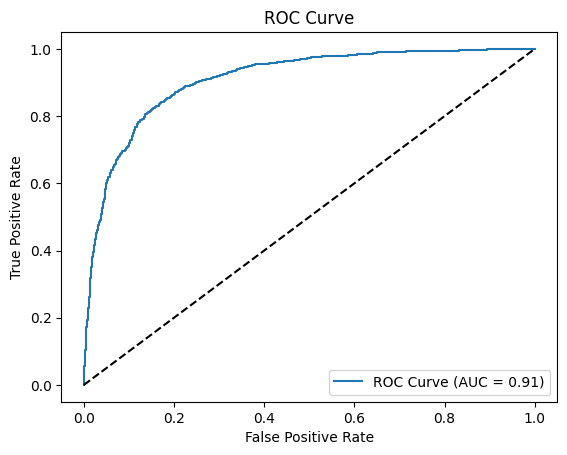

Cross-Validation Scores: [0.79692404 0.82386185 0.85180534 0.84364207 0.84929356]
Mean CV Accuracy: 0.8331


In [33]:
from xgboost import XGBClassifier

xgb=XGBClassifier(
    random_state=42,
    colsample_bytree=0.8974056517708242,
    learning_rate=0.16079112793155764,
    max_depth=14,
    min_child_weight=1,
    n_estimators=366,
    subsample=0.7495966899423762
                  )

xgb.fit(x_train,y_train)

y_train_pred = xgb.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = xgb.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = xgb.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(xgb, x_data, y_data, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data2 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_xgb = pd.DataFrame(data2)

In [34]:
df_xgb

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.8333,0.8108,0.8583,0.8339,[[1322 311]\n [ 220 1333]],0.9091,[0.79692404 0.82386185 0.85180534 0.84364207 0...,0.8331


# 랜덤 포레스트

In [35]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint, uniform

# # 하이퍼파라미터 공간 정의
# param_dist = {
#     'n_estimators': randint(50, 500),
#     'max_features': ['sqrt', 'log2'],
#     'max_depth': randint(10, 100),
#     'min_samples_split': randint(2, 10),
#     'min_samples_leaf': randint(1, 10),
#     'bootstrap': [True, False]
# }

# # 랜덤 서치 설정
# random_search = RandomizedSearchCV(
#     RandomForestClassifier(),
#     param_distributions=param_dist,
#     n_iter=100,         # 시도할 조합의 수
#     cv=5,              # 5-겹 교차 검증
#     verbose=3,         # 진행 상황 출력
#     n_jobs=-1,         # 모든 CPU 코어 사용
#     random_state=42    # 재현성을 위해 랜덤 시드 설정
# )

# # 모델 학습
# random_search.fit(x_train, y_train)

# # 최적 하이퍼파라미터 및 성능 평가
# print("Best parameters found: ", random_search.best_params_)
# print("Best score: ", random_search.best_score_)

train accuracy:1.0000
test accuracy:0.8547
Precision: 0.8389
Recall: 0.8686
F1 Score: 0.8535
Confusion Matrix:
[[1374  259]
 [ 204 1349]]
ROC AUC: 0.9315


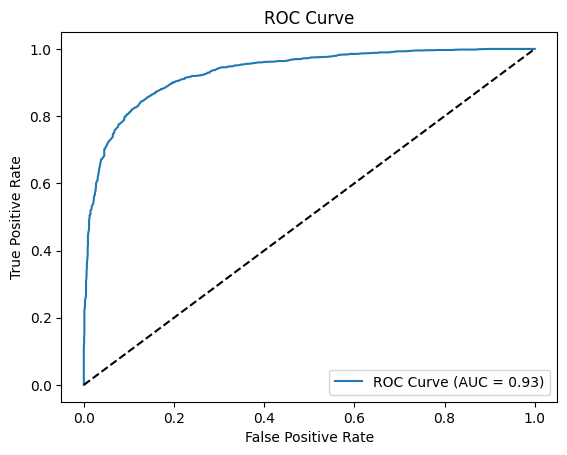

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,
                            bootstrap=False,
                            max_depth=50,
                            max_features='sqrt',
                            min_samples_leaf=1,
                            min_samples_split=2,
                            n_estimators=376
                            )
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = rf.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = rf.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(rf, x_data, y_data, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data1 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_rf = pd.DataFrame(data1)

In [29]:
df_rf

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.8550,0.8361,0.8738,0.8545,[[1367 266]\n [ 196 1357]],0.9321,[0.82799749 0.85525903 0.86342229 0.86499215 0...,0.8561


# 의사 결정 트리

In [30]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

# param_dist = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': np.arange(1, 20),
#     'min_samples_split': np.arange(2, 20),
#     'min_samples_leaf': np.arange(1, 20)
# }

# # 랜덤 서치 설정
# random_search = RandomizedSearchCV(
#     DecisionTreeClassifier(),
#     param_distributions=param_dist,
#     n_iter=50,  # 샘플링할 조합의 수
#     cv=5,  # 교차 검증 폴드 수
#     verbose=1,  # 진행 상황 출력
#     random_state=42
# )

# # 랜덤 서치 수행
# random_search.fit(x_train, y_train)

# # 최적 하이퍼파라미터 출력
# print("Best parameters found: ", random_search.best_params_)

train accuracy:0.9103
test accuracy:0.7549
Precision: 0.7386
Recall: 0.7695
F1 Score: 0.7537
Confusion Matrix:
[[1210  423]
 [ 358 1195]]
ROC AUC: 0.8076


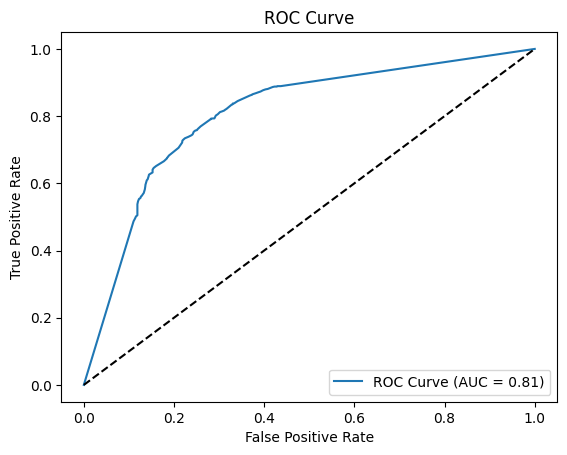

Cross-Validation Scores: [0.72724419 0.74976452 0.76954474 0.7588697  0.77519623]
Mean CV Accuracy: 0.7561


In [31]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier(
    random_state=42,
    min_samples_split=10,
    min_samples_leaf=1,
    max_depth=16,
    criterion='entropy'
    )

dt.fit(x_train,y_train)

y_train_pred = dt.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = dt.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = dt.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(dt, x_data, y_data, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data3 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_dt = pd.DataFrame(data3)

In [32]:
df_dt

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.9103,0.7549,0.7386,0.7695,0.7537,[[1210 423]\n [ 358 1195]],0.8076,[0.72724419 0.74976452 0.76954474 0.7588697 0...,0.7561


# 로지스틱 회귀

In [33]:
# from sklearn.linear_model import LogisticRegression

# # 하이퍼파라미터 공간 정의
# param_dist = {
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'C': np.logspace(-4, 4, 20),  # 정규화 강도를 조정하는 하이퍼파라미터
#     'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga'],
#     'max_iter': [100, 200, 300]
# }

# # 로지스틱 회귀 모델 생성
# log_reg = LogisticRegression()

# # 랜덤 서치 설정
# random_search = RandomizedSearchCV(
#     log_reg,
#     param_distributions=param_dist,
#     n_iter=50,  # 샘플링할 조합의 수
#     cv=5,  # 교차 검증 폴드 수
#     verbose=1,  # 진행 상황 출력
#     random_state=42
# )

# # 랜덤 서치 수행
# random_search.fit(x_train, y_train)

# # 최적 하이퍼파라미터 출력
# print("Best parameters found: ", random_search.best_params_)

train accuracy:0.7060
test accuracy:0.7021
Precision: 0.6936
Recall: 0.6967
F1 Score: 0.6951
Confusion Matrix:
[[1155  478]
 [ 471 1082]]
ROC AUC: 0.7528


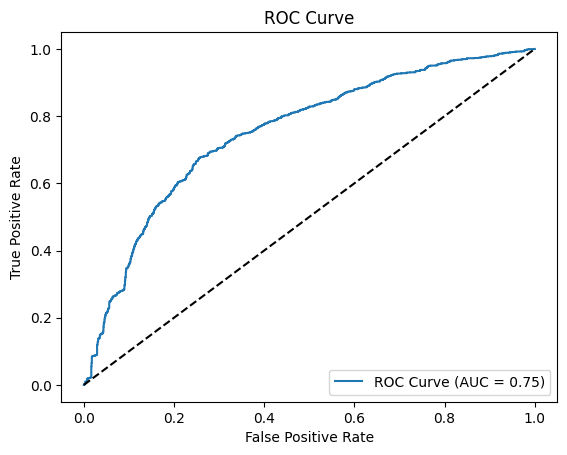

Cross-Validation Scores: [0.70778406 0.69638932 0.71585557 0.70737834 0.69921507]
Mean CV Accuracy: 0.7053


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 로지스틱 회귀 모델 초기화
lr = LogisticRegression(
    random_state=42,
    solver='newton-cg',
    penalty='l2',
    max_iter=200,
    C=0.0018329807108324356
    )

lr.fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = lr.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = lr.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(lr, x_data, y_data, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data4 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_lr = pd.DataFrame(data4)

In [35]:
df_lr

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.7060,0.7021,0.6936,0.6967,0.6951,[[1155 478]\n [ 471 1082]],0.7528,[0.70778406 0.69638932 0.71585557 0.70737834 0...,0.7053


# support vector machine

In [36]:
# from sklearn.svm import SVC
# import numpy as np

# # 하이퍼파라미터 공간 정의
# param_dist = {
#     'C': np.logspace(-2, 2, 5),  # 정규화 강도 범위 축소
#     'gamma': np.logspace(-2, 2, 5),  # 커널 계수 범위 축소
#     'kernel': ['linear', 'rbf'],  # 커널 함수 종류 제한
#     'degree': [2, 3]  # 다항식 커널의 차수
# }

# # SVM 모델 생성
# svm = SVC()

# # 랜덤 서치 설정
# random_search = RandomizedSearchCV(
#     svm,
#     param_distributions=param_dist,
#     n_iter=20,  # 샘플링할 조합의 수 축소
#     cv=3,  # 교차 검증 폴드 수 축소
#     verbose=1,  # 진행 상황 출력
#     random_state=42,
#     n_jobs=-1  # 병렬 처리
# )

# # 랜덤 서치 수행
# random_search.fit(x_train, y_train)

# # 최적 하이퍼파라미터 출력
# print("Best parameters found: ", random_search.best_params_)

train accuracy:0.8712
test accuracy:0.8007
Precision: 0.7602
Recall: 0.8635
F1 Score: 0.8086
Confusion Matrix:
[[1210  423]
 [ 212 1341]]
ROC AUC: 0.7528


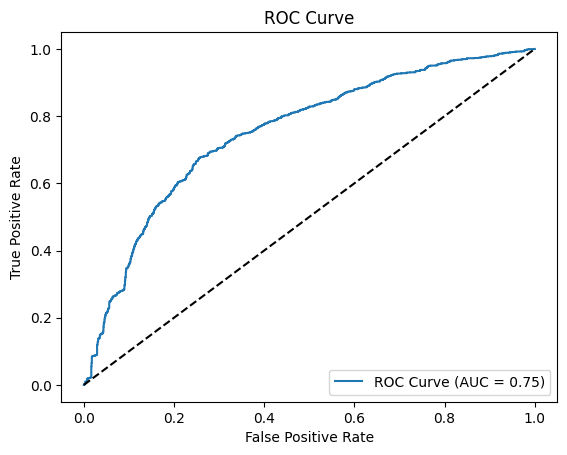

Cross-Validation Scores: [0.79441306 0.80313972 0.80753532 0.80313972 0.81569859]
Mean CV Accuracy: 0.8048


In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# SVM 모델 초기화
svc = SVC(
    random_state=42,
    kernel='rbf',
    gamma=10.0,
    degree=3,
    C=10.0
    )

svc.fit(x_train,y_train)

y_train_pred = svc.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = svc.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

# y_pred_proba = svc.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(svc, x_data, y_data, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data5 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_svc = pd.DataFrame(data5)

In [38]:
df_svc

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.8712,0.8007,0.7602,0.8635,0.8086,[[1210 423]\n [ 212 1341]],0.7528,[0.79441306 0.80313972 0.80753532 0.80313972 0...,0.8048


# artificial neural network

In [39]:
# from sklearn.neural_network import MLPClassifier

# # 하이퍼파라미터 공간 정의
# param_dist = {
#     'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100, 50)],  # 은닉층 크기
#     'activation': ['tanh', 'relu'],  # 활성화 함수
#     'solver': ['sgd', 'adam'],  # 최적화 알고리즘
#     'alpha': np.logspace(-4, -1, 4),  # L2 규제 파라미터
#     'learning_rate': ['constant', 'adaptive'],  # 학습률
# }

# # MLPClassifier 모델 생성
# mlp = MLPClassifier(max_iter=200)

# # 랜덤 서치 설정
# random_search = RandomizedSearchCV(
#     mlp, 
#     param_distributions=param_dist, 
#     n_iter=20,  # 샘플링할 조합의 수
#     cv=3,  # 교차 검증 폴드 수
#     verbose=1,  # 진행 상황 출력
#     random_state=42, 
#     n_jobs=-1  # 병렬 처리
# )

# # 랜덤 서치 수행
# random_search.fit(x_train, y_train)

# # 최적 하이퍼파라미터 출력
# print("Best parameters found: ", random_search.best_params_)

c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


train accuracy:0.8243
test accuracy:0.7756
Precision: 0.7386
Recall: 0.8352
F1 Score: 0.7839
Confusion Matrix:
[[1174  459]
 [ 256 1297]]
ROC AUC: 0.8610


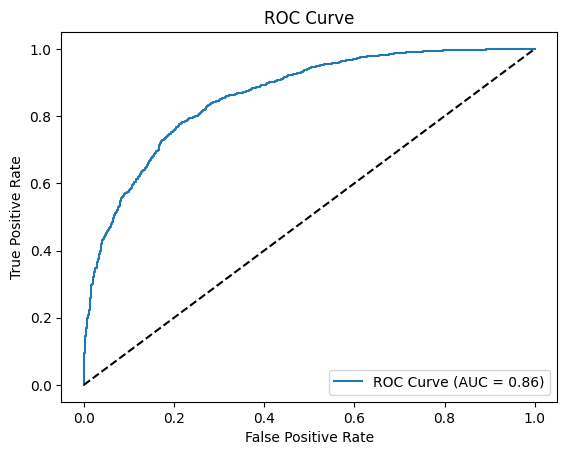

c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [0.75737602 0.77394035 0.78367347 0.78241758 0.78398744]
Mean CV Accuracy: 0.7763


c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 인공 신경망 모델 초기화
# hidden_layer_sizes는 각 은닉층의 뉴런 수를 설정
mlp = MLPClassifier(
    random_state=42,
    solver='adam',
    learning_rate='adaptive',
    hidden_layer_sizes=(100, 100, 50),
    alpha=0.001,
    activation='tanh'
    )

mlp.fit(x_train,y_train)

y_train_pred = mlp.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = mlp.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = mlp.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(mlp, x_data, y_data, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data6 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_mlp = pd.DataFrame(data6)

In [41]:
df_mlp

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.8243,0.7756,0.7386,0.8352,0.7839,[[1174 459]\n [ 256 1297]],0.8610,[0.75737602 0.77394035 0.78367347 0.78241758 0...,0.7763


# lightgbm

In [42]:
# import lightgbm as lgb

# # 하이퍼파라미터 공간 정의
# param_dist = {
#     'num_leaves': np.arange(20, 150, 10),  # 트리의 최대 리프 노드 개수
#     'learning_rate': np.logspace(-3, 0, 5),  # 학습률
#     'n_estimators': np.arange(50, 500, 50),  # 트리 개수
#     'max_depth': np.arange(3, 15, 2),  # 트리의 최대 깊이
#     'min_child_samples': np.arange(10, 100, 10),  # 리프 노드가 가져야 하는 최소 샘플 수
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # 각 트리에 사용할 데이터 비율
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # 각 트리에 사용할 피처 비율
# }

# # LightGBM 모델 생성
# lgb_model = lgb.LGBMClassifier()

# # 랜덤 서치 설정
# random_search = RandomizedSearchCV(
#     lgb_model, 
#     param_distributions=param_dist, 
#     n_iter=20,  # 시도할 하이퍼파라미터 조합의 수
#     cv=3,  # 교차 검증 폴드 수
#     verbose=1,  # 진행 상황 출력
#     random_state=42, 
#     n_jobs=-1  # 병렬 처리
# )

# # 랜덤 서치 수행
# random_search.fit(x_train, y_train)

# # 최적 하이퍼파라미터 출력
# print("Best parameters found: ", random_search.best_params_)

[LightGBM] [Info] Number of positive: 6410, number of negative: 6330
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503140 -> initscore=0.012559
[LightGBM] [Info] Start training from score 0.012559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

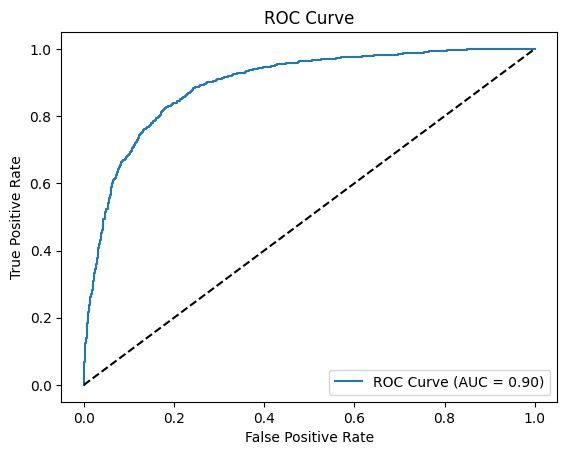

[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [43]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    random_state=42,
    subsample=0.7,
    num_leaves=120,
    n_estimators=300,
    min_child_samples=50,
    max_depth=13,
    learning_rate=1.0,
    colsample_bytree=1.0
    )

lgbm.fit(x_train,y_train)

y_train_pred = lgbm.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = lgbm.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = lgbm.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(lgbm, x_data, y_data, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data7 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_lgbm = pd.DataFrame(data7)

In [44]:
df_lgbm

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.8167,0.7845,0.8603,0.8206,[[1266 367]\n [ 217 1336]],0.8954,[0.76490898 0.80470958 0.83956044 0.82951334 0...,0.8134


# gradient boosting

In [45]:
# from sklearn.ensemble import GradientBoostingClassifier

# # 하이퍼파라미터 공간 정의
# param_dist = {
#     'n_estimators': np.arange(50, 400, 50),  # 트리의 개수
#     'learning_rate': np.logspace(-3, 0, 4),  # 학습률
#     'max_depth': np.arange(3, 10, 1),  # 트리의 최대 깊이
#     'min_samples_split': np.arange(2, 10, 2),  # 내부 노드를 분할하는 데 필요한 최소 샘플 수
#     'min_samples_leaf': np.arange(1, 10, 2),  # 리프 노드가 가져야 하는 최소 샘플 수
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # 각 트리에 사용할 데이터 비율
#     'max_features': ['auto', 'sqrt', 'log2'],  # 각 트리에 사용할 피처 수
# }

# # Gradient Boosting 모델 생성
# gbc = GradientBoostingClassifier()

# # 랜덤 서치 설정
# random_search = RandomizedSearchCV(
#     gbc, 
#     param_distributions=param_dist, 
#     n_iter=20,  # 샘플링할 조합의 수
#     cv=3,  # 교차 검증 폴드 수
#     verbose=1,  # 진행 상황 출력
#     random_state=42, 
#     n_jobs=-1  # 병렬 처리
# )

# # 랜덤 서치 수행
# random_search.fit(x_train, y_train)

# # 최적 하이퍼파라미터 출력
# print("Best parameters found: ", random_search.best_params_)

train accuracy:1.0000
test accuracy:0.8117
Precision: 0.7883
Recall: 0.8390
F1 Score: 0.8129
Confusion Matrix:
[[1283  350]
 [ 250 1303]]
ROC AUC: 0.8826


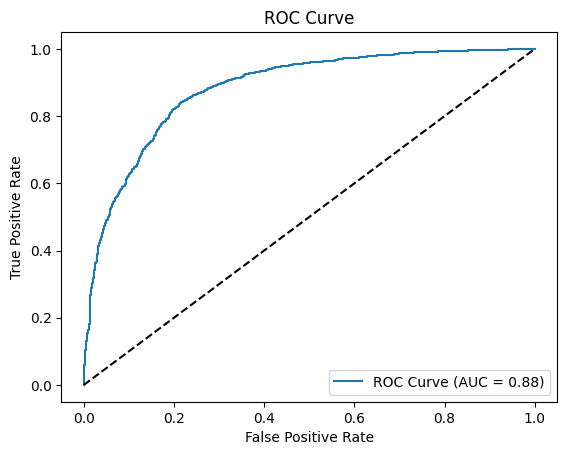

Cross-Validation Scores: [0.74387947 0.80502355 0.8266876  0.81475667 0.76954474]
Mean CV Accuracy: 0.7920


In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    random_state=42,
    subsample=0.9,
    n_estimators=250,
    min_samples_split=2,
    min_samples_leaf=7,
    max_features='log2',
    max_depth=7,
    learning_rate=1.0                            
                                )

gb.fit(x_train,y_train)

y_train_pred = gb.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = gb.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = gb.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(gb, x_data, y_data, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data8 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_gb = pd.DataFrame(data8)

In [47]:
df_gb

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.8117,0.7883,0.8390,0.8129,[[1283 350]\n [ 250 1303]],0.8826,[0.74387947 0.80502355 0.8266876 0.81475667 0...,0.7920


# naive bayes

In [48]:
# from sklearn.naive_bayes import GaussianNB

# # 하이퍼파라미터 공간 정의
# param_dist = {
#     'var_smoothing': np.logspace(0, -9, num=100)  # 1부터 10^(-9)까지의 값을 탐색
# }

# # GaussianNB 모델 생성
# gnb = GaussianNB()

# # 랜덤 서치 설정
# random_search = RandomizedSearchCV(
#     gnb, 
#     param_distributions=param_dist, 
#     n_iter=20,  # 시도할 하이퍼파라미터 조합 수
#     cv=3,  # 교차 검증 폴드 수
#     verbose=1,  # 진행 상황 출력
#     random_state=42, 
#     n_jobs=-1  # 병렬 처리
# )

# # 랜덤 서치 수행
# random_search.fit(x_train, y_train)

# # 최적 하이퍼파라미터 출력
# print("Best parameters found: ", random_search.best_params_)

train accuracy:0.7079
test accuracy:0.7062
Precision: 0.6981
Recall: 0.6999
F1 Score: 0.6990
Confusion Matrix:
[[1163  470]
 [ 466 1087]]
ROC AUC: 0.7567


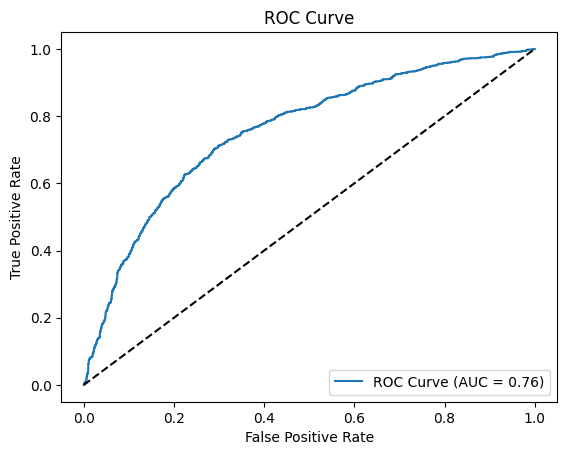

Cross-Validation Scores: [0.7049592  0.70078493 0.71962323 0.70800628 0.69827316]
Mean CV Accuracy: 0.7063


In [49]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB(
    var_smoothing=0.02310129700083159
                )

nb.fit(x_train,y_train)

y_train_pred = nb.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = nb.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = nb.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(nb, x_data, y_data, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data9 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_nb = pd.DataFrame(data9)

In [50]:
df_nb

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.7079,0.7062,0.6981,0.6999,0.6990,[[1163 470]\n [ 466 1087]],0.7567,[0.7049592 0.70078493 0.71962323 0.70800628 0...,0.7063


# catboost

In [51]:
# from catboost import CatBoostClassifier

# # 하이퍼파라미터 공간 정의
# param_dist = {
#     'depth': np.arange(4, 10),  # 트리의 깊이
#     'learning_rate': np.logspace(-3, 0, 10),  # 학습률
#     'iterations': np.arange(100, 1000, 100),  # 트리의 개수
#     'l2_leaf_reg': np.logspace(-2, 2, 10),  # L2 정규화 계수
#     'border_count': np.arange(32, 256, 32)  # 정렬 경계의 수 (트리 분할에 사용됨)
# }

# # CatBoostClassifier 모델 생성
# catboost_model = CatBoostClassifier(verbose=0)

# # 랜덤 서치 설정
# random_search = RandomizedSearchCV(
#     catboost_model, 
#     param_distributions=param_dist, 
#     n_iter=20,  # 시도할 하이퍼파라미터 조합 수
#     cv=3,  # 교차 검증 폴드 수
#     verbose=1,  # 진행 상황 출력
#     random_state=42,
#     n_jobs=-1  # 병렬 처리
# )

# # 랜덤 서치 수행
# random_search.fit(x_train, y_train)

# # 최적 하이퍼파라미터 출력
# print("Best parameters found: ", random_search.best_params_)

0:	learn: 0.5790876	total: 175ms	remaining: 1m 27s
1:	learn: 0.5412223	total: 196ms	remaining: 48.8s
2:	learn: 0.5172218	total: 218ms	remaining: 36.1s
3:	learn: 0.5074486	total: 239ms	remaining: 29.6s
4:	learn: 0.4962861	total: 260ms	remaining: 25.7s
5:	learn: 0.4891822	total: 274ms	remaining: 22.6s
6:	learn: 0.4813379	total: 294ms	remaining: 20.7s
7:	learn: 0.4769223	total: 309ms	remaining: 19s
8:	learn: 0.4721761	total: 320ms	remaining: 17.5s
9:	learn: 0.4663887	total: 333ms	remaining: 16.3s
10:	learn: 0.4596441	total: 347ms	remaining: 15.4s
11:	learn: 0.4557344	total: 363ms	remaining: 14.7s
12:	learn: 0.4511440	total: 378ms	remaining: 14.2s
13:	learn: 0.4455181	total: 394ms	remaining: 13.7s
14:	learn: 0.4424850	total: 414ms	remaining: 13.4s
15:	learn: 0.4373114	total: 429ms	remaining: 13s
16:	learn: 0.4327787	total: 442ms	remaining: 12.6s
17:	learn: 0.4282079	total: 461ms	remaining: 12.3s
18:	learn: 0.4201921	total: 477ms	remaining: 12.1s
19:	learn: 0.4150149	total: 491ms	remaining:

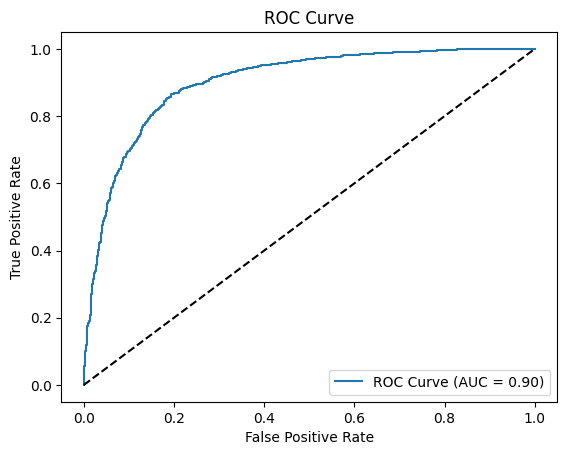

0:	learn: 0.5799247	total: 13.3ms	remaining: 6.61s
1:	learn: 0.5382815	total: 23.9ms	remaining: 5.96s
2:	learn: 0.5167758	total: 32.4ms	remaining: 5.37s
3:	learn: 0.5037902	total: 45.3ms	remaining: 5.62s
4:	learn: 0.4952705	total: 55.7ms	remaining: 5.51s
5:	learn: 0.4845427	total: 64.1ms	remaining: 5.28s
6:	learn: 0.4769333	total: 74.3ms	remaining: 5.23s
7:	learn: 0.4675918	total: 82.6ms	remaining: 5.08s
8:	learn: 0.4618804	total: 91.2ms	remaining: 4.97s
9:	learn: 0.4508625	total: 99.8ms	remaining: 4.89s
10:	learn: 0.4448516	total: 110ms	remaining: 4.9s
11:	learn: 0.4387433	total: 120ms	remaining: 4.88s
12:	learn: 0.4333039	total: 129ms	remaining: 4.85s
13:	learn: 0.4251094	total: 142ms	remaining: 4.92s
14:	learn: 0.4218407	total: 152ms	remaining: 4.92s
15:	learn: 0.4174831	total: 162ms	remaining: 4.91s
16:	learn: 0.4093246	total: 173ms	remaining: 4.93s
17:	learn: 0.4017183	total: 182ms	remaining: 4.86s
18:	learn: 0.3979272	total: 192ms	remaining: 4.87s
19:	learn: 0.3927489	total: 203m

In [52]:
from catboost import CatBoostClassifier, Pool

cb = CatBoostClassifier(
    random_state=42,
    learning_rate=0.46415888336127775,
    l2_leaf_reg=1.6681005372000592,
    iterations=500,
    depth=8,
    border_count=160
)

cb.fit(x_train,y_train)

y_train_pred = cb.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = cb.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = cb.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(cb, x_data, y_data, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data10 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_cb = pd.DataFrame(data10)

In [53]:
df_cb

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.8318,0.8043,0.8654,0.8337,[[1306 327]\n [ 209 1344]],0.9010,[0.77087257 0.82417582 0.85211931 0.84081633 0...,0.8270


# 평가 지표 데이터프레임 concat

In [54]:
import pandas as pd

# 행 방향으로 병합 (위아래로 연결)
result = pd.concat(
    [df_rf, df_xgb, df_dt, df_lr, df_svc, df_mlp, df_lgbm, df_gb, df_nb, df_cb],
    axis=0,
    ignore_index=True
    )

new_index = ['radom_forest','xgboost','decision_tree','logistic_regression','svc',
             'ann','lightgbm','gradient_boosting','naive_bayes','catboost',]

result.index=new_index

result

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
radom_forest,1.0000,0.8550,0.8361,0.8738,0.8545,[[1367 266]\n [ 196 1357]],0.9321,[0.82799749 0.85525903 0.86342229 0.86499215 0...,0.8561
xgboost,1.0000,0.8352,0.8115,0.8622,0.8361,[[1322 311]\n [ 214 1339]],0.9092,[0.78656623 0.83076923 0.85023548 0.84615385 0...,0.8329
decision_tree,0.9103,0.7549,0.7386,0.7695,0.7537,[[1210 423]\n [ 358 1195]],0.8076,[0.72724419 0.74976452 0.76954474 0.7588697 0...,0.7561
logistic_regression,0.7060,0.7021,0.6936,0.6967,0.6951,[[1155 478]\n [ 471 1082]],0.7528,[0.70778406 0.69638932 0.71585557 0.70737834 0...,0.7053
svc,0.8712,0.8007,0.7602,0.8635,0.8086,[[1210 423]\n [ 212 1341]],0.7528,[0.79441306 0.80313972 0.80753532 0.80313972 0...,0.8048
ann,0.8243,0.7756,0.7386,0.8352,0.7839,[[1174 459]\n [ 256 1297]],0.8610,[0.75737602 0.77394035 0.78367347 0.78241758 0...,0.7763
lightgbm,1.0000,0.8167,0.7845,0.8603,0.8206,[[1266 367]\n [ 217 1336]],0.8954,[0.76490898 0.80470958 0.83956044 0.82951334 0...,0.8134
gradient_boosting,1.0000,0.8117,0.7883,0.8390,0.8129,[[1283 350]\n [ 250 1303]],0.8826,[0.74387947 0.80502355 0.8266876 0.81475667 0...,0.7920
naive_bayes,0.7079,0.7062,0.6981,0.6999,0.6990,[[1163 470]\n [ 466 1087]],0.7567,[0.7049592 0.70078493 0.71962323 0.70800628 0...,0.7063
catboost,1.0000,0.8318,0.8043,0.8654,0.8337,[[1306 327]\n [ 209 1344]],0.9010,[0.77087257 0.82417582 0.85211931 0.84081633 0...,0.8270


In [55]:
result_sorted_f1 = result.sort_values(by='F1 Score', ascending=False)

# 인덱스 재설정
result_sorted_f1.reset_index(drop=False, inplace=True)
result_sorted_f1 = result_sorted_f1.rename(columns={'index':'model'})
result_sorted_f1

,model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,radom_forest,1.0000,0.8550,0.8361,0.8738,0.8545,[[1367 266]\n [ 196 1357]],0.9321,[0.82799749 0.85525903 0.86342229 0.86499215 0...,0.8561
1,xgboost,1.0000,0.8352,0.8115,0.8622,0.8361,[[1322 311]\n [ 214 1339]],0.9092,[0.78656623 0.83076923 0.85023548 0.84615385 0...,0.8329
2,catboost,1.0000,0.8318,0.8043,0.8654,0.8337,[[1306 327]\n [ 209 1344]],0.9010,[0.77087257 0.82417582 0.85211931 0.84081633 0...,0.8270
3,lightgbm,1.0000,0.8167,0.7845,0.8603,0.8206,[[1266 367]\n [ 217 1336]],0.8954,[0.76490898 0.80470958 0.83956044 0.82951334 0...,0.8134
4,gradient_boosting,1.0000,0.8117,0.7883,0.8390,0.8129,[[1283 350]\n [ 250 1303]],0.8826,[0.74387947 0.80502355 0.8266876 0.81475667 0...,0.7920
5,svc,0.8712,0.8007,0.7602,0.8635,0.8086,[[1210 423]\n [ 212 1341]],0.7528,[0.79441306 0.80313972 0.80753532 0.80313972 0...,0.8048
6,ann,0.8243,0.7756,0.7386,0.8352,0.7839,[[1174 459]\n [ 256 1297]],0.8610,[0.75737602 0.77394035 0.78367347 0.78241758 0...,0.7763
7,decision_tree,0.9103,0.7549,0.7386,0.7695,0.7537,[[1210 423]\n [ 358 1195]],0.8076,[0.72724419 0.74976452 0.76954474 0.7588697 0...,0.7561
8,naive_bayes,0.7079,0.7062,0.6981,0.6999,0.6990,[[1163 470]\n [ 466 1087]],0.7567,[0.7049592 0.70078493 0.71962323 0.70800628 0...,0.7063
9,logistic_regression,0.7060,0.7021,0.6936,0.6967,0.6951,[[1155 478]\n [ 471 1082]],0.7528,[0.70778406 0.69638932 0.71585557 0.70737834 0...,0.7053


In [56]:
result_sorted_rocauc = result.sort_values(by='ROC AUC', ascending=False)

# 인덱스 재설정
result_sorted_rocauc.reset_index(drop=False, inplace=True)
result_sorted_rocauc = result_sorted_rocauc.rename(columns={'index':'model'})
result_sorted_rocauc

,model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,radom_forest,1.0000,0.8550,0.8361,0.8738,0.8545,[[1367 266]\n [ 196 1357]],0.9321,[0.82799749 0.85525903 0.86342229 0.86499215 0...,0.8561
1,xgboost,1.0000,0.8352,0.8115,0.8622,0.8361,[[1322 311]\n [ 214 1339]],0.9092,[0.78656623 0.83076923 0.85023548 0.84615385 0...,0.8329
2,catboost,1.0000,0.8318,0.8043,0.8654,0.8337,[[1306 327]\n [ 209 1344]],0.9010,[0.77087257 0.82417582 0.85211931 0.84081633 0...,0.8270
3,lightgbm,1.0000,0.8167,0.7845,0.8603,0.8206,[[1266 367]\n [ 217 1336]],0.8954,[0.76490898 0.80470958 0.83956044 0.82951334 0...,0.8134
4,gradient_boosting,1.0000,0.8117,0.7883,0.8390,0.8129,[[1283 350]\n [ 250 1303]],0.8826,[0.74387947 0.80502355 0.8266876 0.81475667 0...,0.7920
5,ann,0.8243,0.7756,0.7386,0.8352,0.7839,[[1174 459]\n [ 256 1297]],0.8610,[0.75737602 0.77394035 0.78367347 0.78241758 0...,0.7763
6,decision_tree,0.9103,0.7549,0.7386,0.7695,0.7537,[[1210 423]\n [ 358 1195]],0.8076,[0.72724419 0.74976452 0.76954474 0.7588697 0...,0.7561
7,naive_bayes,0.7079,0.7062,0.6981,0.6999,0.6990,[[1163 470]\n [ 466 1087]],0.7567,[0.7049592 0.70078493 0.71962323 0.70800628 0...,0.7063
8,logistic_regression,0.7060,0.7021,0.6936,0.6967,0.6951,[[1155 478]\n [ 471 1082]],0.7528,[0.70778406 0.69638932 0.71585557 0.70737834 0...,0.7053
9,svc,0.8712,0.8007,0.7602,0.8635,0.8086,[[1210 423]\n [ 212 1341]],0.7528,[0.79441306 0.80313972 0.80753532 0.80313972 0...,0.8048


# 랜덤 포레스트 특성 중요도

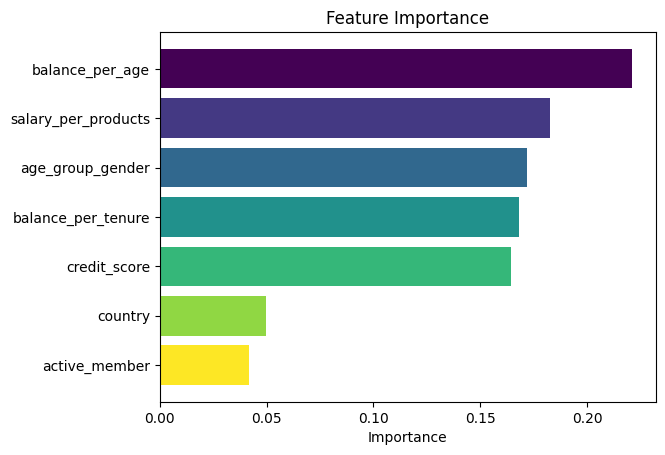

In [57]:
import matplotlib.pyplot as plt

# 특성 중요도 가져오기
importances = rf.feature_importances_
feature_names = x2.columns

# 중요도를 데이터프레임으로 변환하고 정렬
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화
#plt.figure(figsize=(14, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color=plt.cm.viridis(np.linspace(0, 1, len(importance_df))))

# 정확한 수치 표시
#for bar in bars:
 #   width = bar.get_width()
  #  plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}', va='center')

plt.xlabel('Importance')
#plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # y축을 위에서 아래로 정렬
plt.show()

# optim-rfe(Recursive Feature Elimination)

In [58]:
# x2 = df_normalized[df_normalized.columns.difference(['churn','country','active_member'])]
# y2 = df_normalized['churn']

In [59]:
# from collections import Counter
# from imblearn.over_sampling import SMOTE
# sm=SMOTE()
# x_data,y_data=sm.fit_resample(x2,y2)
# print(Counter(y_data))

In [60]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,
#                                                test_size=0.2,random_state=42)

In [61]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(random_state=42,
#                             bootstrap=False,
#                             max_depth=50,
#                             max_features='sqrt',
#                             min_samples_leaf=1,
#                             min_samples_split=2,
#                             n_estimators=376
#                             )
# rf.fit(x_train, y_train)

# y_train_pred = rf.predict(x_train)
# print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

# y_test_pred = rf.predict(x_test)
# print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# # ======================================================================================

# y_pred_proba = rf.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# # 1. 정밀도 (Precision)
# precision = precision_score(y_test, y_test_pred)
# print(f'Precision: {precision:.4f}')

# # 2. 재현율 (Recall)
# recall = recall_score(y_test, y_test_pred)
# print(f'Recall: {recall:.4f}')

# # 3. F1 점수
# f1 = f1_score(y_test, y_test_pred)
# print(f'F1 Score: {f1:.4f}')

# # 4. 혼동 행렬 (Confusion Matrix)
# cm = confusion_matrix(y_test, y_test_pred)
# print(f'Confusion Matrix:\n{cm}')

# # 5. ROC 곡선과 AUC
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# auc = roc_auc_score(y_test, y_pred_proba)
# print(f'ROC AUC: {auc:.4f}')

# # ROC(Receiver Operating Characteristic) 곡선 플롯
# plt.figure()
# plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
# plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc='lower right')
# plt.show()

# # 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
# cv = StratifiedKFold(n_splits=5)
# cross_val_scores = cross_val_score(rf, x, y, cv=cv, scoring='accuracy')
# print(f'Cross-Validation Scores: {cross_val_scores}')
# print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# # 모델 평가 결과로 데이터 프레임 만들기
# data1 = {
#     'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
#     'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
#     'Precision':[f'{precision:.4f}'],
#     'Recall':[f'{recall:.4f}'],
#     'F1 Score':[f'{f1:.4f}'],
#     'Confusion Matrix':[f'{cm}'],
#     'ROC AUC':[f'{auc:.4f}'],
#     'Cross-Validation Scores':[f'{cross_val_scores}'],
#     'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
# }

# df_rf = pd.DataFrame(data1)

In [62]:
# df_rf

In [63]:
# 필요없는 과정
# 특성을 너무 줄여도 안 좋은 것 같다
# 성능이 더 떨어진다

# optim-앙상블 모델

In [64]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# 기본 모델 정의
base_estimators = [
    ('rf', RandomForestClassifier(
        random_state=42,
        bootstrap=False,
        max_depth=50,
        max_features='sqrt',
        min_samples_leaf=1,
        min_samples_split=2,
        n_estimators=376
        )),
    ('xgb', XGBClassifier(
        random_state=42,
        colsample_bytree=0.8974056517708242,
        learning_rate=0.16079112793155764,
        max_depth=14,
        min_child_weight=1,
        n_estimators=366,
        subsample=0.7495966899423762
        )),
    ('catboost', CatBoostClassifier(
    random_state=42,
    learning_rate=0.46415888336127775,
    l2_leaf_reg=1.6681005372000592,
    iterations=500,
    depth=8,
    border_count=160
        ))
]

# 스태킹 모델 정의
stacking_model = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

# 모델 훈련
stacking_model.fit(x_train, y_train)

# 예측 및 평가
y_pred = stacking_model.predict(x_test)
print("Stacking Model Accuracy:", accuracy_score(y_test, y_pred))


0:	learn: 0.5790876	total: 13.5ms	remaining: 6.75s
1:	learn: 0.5412223	total: 28.2ms	remaining: 7.01s
2:	learn: 0.5172218	total: 39.8ms	remaining: 6.59s
3:	learn: 0.5074486	total: 48.8ms	remaining: 6.06s
4:	learn: 0.4962861	total: 61.8ms	remaining: 6.12s
5:	learn: 0.4891822	total: 74ms	remaining: 6.1s
6:	learn: 0.4813379	total: 82.9ms	remaining: 5.84s
7:	learn: 0.4769223	total: 94.8ms	remaining: 5.83s
8:	learn: 0.4721761	total: 107ms	remaining: 5.83s
9:	learn: 0.4663887	total: 116ms	remaining: 5.68s
10:	learn: 0.4596441	total: 128ms	remaining: 5.67s
11:	learn: 0.4557344	total: 137ms	remaining: 5.58s
12:	learn: 0.4511440	total: 146ms	remaining: 5.48s
13:	learn: 0.4455181	total: 158ms	remaining: 5.47s
14:	learn: 0.4424850	total: 168ms	remaining: 5.42s
15:	learn: 0.4373114	total: 178ms	remaining: 5.38s
16:	learn: 0.4327787	total: 189ms	remaining: 5.38s
17:	learn: 0.4282079	total: 198ms	remaining: 5.31s
18:	learn: 0.4201921	total: 208ms	remaining: 5.27s
19:	learn: 0.4150149	total: 219ms	re

train accuracy:1.0000
test accuracy:0.8584
Precision: 0.8431
Recall: 0.8719
F1 Score: 0.8572
Confusion Matrix:
[[1381  252]
 [ 199 1354]]
ROC AUC: 0.9331


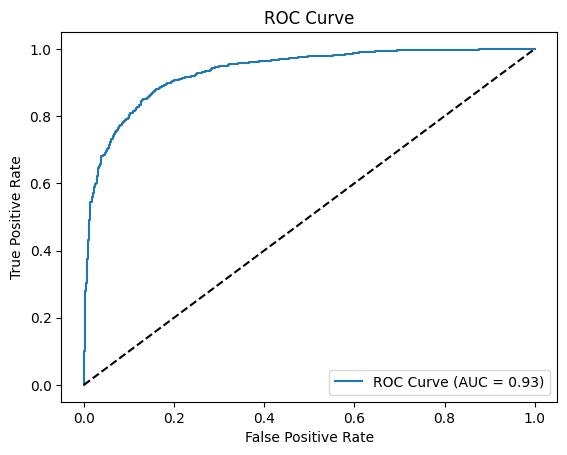

0:	learn: 0.5799247	total: 15.5ms	remaining: 7.71s
1:	learn: 0.5382815	total: 29.9ms	remaining: 7.44s
2:	learn: 0.5167758	total: 44.3ms	remaining: 7.33s
3:	learn: 0.5037902	total: 57.6ms	remaining: 7.15s
4:	learn: 0.4952705	total: 69.7ms	remaining: 6.9s
5:	learn: 0.4845427	total: 84.6ms	remaining: 6.96s
6:	learn: 0.4769333	total: 98.2ms	remaining: 6.91s
7:	learn: 0.4675918	total: 113ms	remaining: 6.92s
8:	learn: 0.4618804	total: 123ms	remaining: 6.73s
9:	learn: 0.4508625	total: 135ms	remaining: 6.62s
10:	learn: 0.4448516	total: 149ms	remaining: 6.61s
11:	learn: 0.4387433	total: 164ms	remaining: 6.67s
12:	learn: 0.4333039	total: 178ms	remaining: 6.67s
13:	learn: 0.4251094	total: 191ms	remaining: 6.64s
14:	learn: 0.4218407	total: 203ms	remaining: 6.58s
15:	learn: 0.4174831	total: 216ms	remaining: 6.53s
16:	learn: 0.4093246	total: 230ms	remaining: 6.53s
17:	learn: 0.4017183	total: 244ms	remaining: 6.53s
18:	learn: 0.3979272	total: 257ms	remaining: 6.51s
19:	learn: 0.3927489	total: 270ms	r

In [65]:
y_train_pred = stacking_model.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = stacking_model.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = stacking_model.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(stacking_model, x_data, y_data, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data11 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_stacking_model = pd.DataFrame(data11)

In [66]:
df_stacking_model

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.8584,0.8431,0.8719,0.8572,[[1381 252]\n [ 199 1354]],0.9331,[0.82266164 0.85023548 0.86844584 0.8678179 0...,0.8559


# 랜덤 포레스트 모델 최적화

In [67]:
# L1, L2 정규화 (Lasso, Ridge):
# 모델의 가중치 값에 패널티를 주어 과도한 학습을 방지합니다.
# 이를 통해 가중치가 너무 커지는 것을 방지하고, 과적합을 완화할 수 있습니다.

# 랜덤 포레스트 모델은 지원 안 한다..

train accuracy:0.8264
test accuracy:0.7715
Precision: 0.7737
Recall: 0.7508
F1 Score: 0.7621
Confusion Matrix:
[[1292  341]
 [ 387 1166]]
ROC AUC: 0.8562


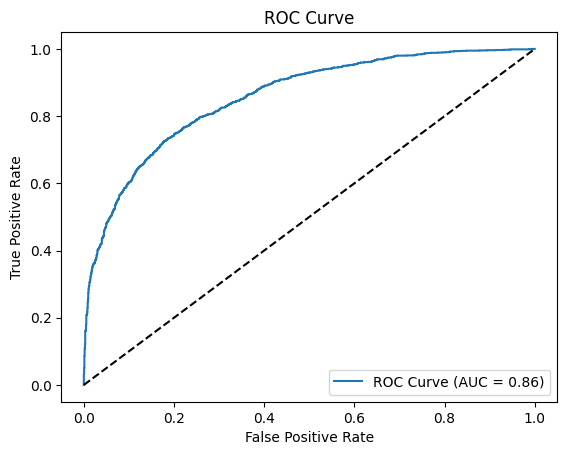

Cross-Validation Scores: [0.77080063 0.79199372 0.76923077 0.77237049 0.78296703]
Mean CV Accuracy: 0.7775


In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,
                            # bootstrap=False,
                            bootstrap=True,
                            # max_depth=50,
                            max_depth=10,
                            max_features='sqrt',
                            # min_samples_leaf=1,
                            min_samples_leaf=5,
                            # min_samples_split=2,
                            min_samples_split=10,
                            # n_estimators=376
                            n_estimators=100
                            )
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = rf.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = rf.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(rf, x_train, y_train, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data1 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_rf = pd.DataFrame(data1)

train accuracy:1.0000
test accuracy:0.8550
Precision: 0.8361
Recall: 0.8738
F1 Score: 0.8545
Confusion Matrix:
[[1367  266]
 [ 196 1357]]
ROC AUC: 0.9321


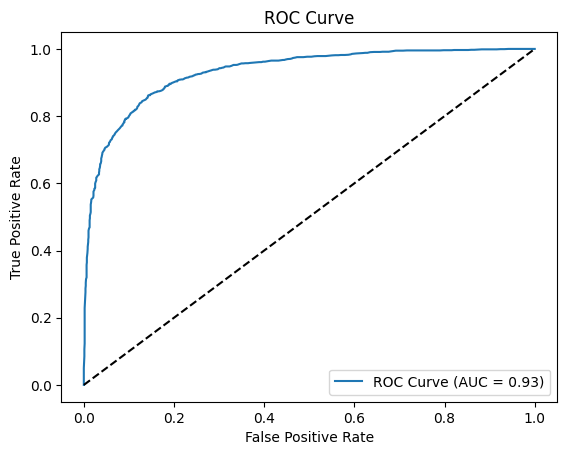

Cross-Validation Scores: [0.83791209 0.84419152 0.83948195 0.83163265 0.85007849]
Mean CV Accuracy: 0.8407


In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,
                            bootstrap=False,
                            max_depth=50,
                            max_features='sqrt',
                            min_samples_leaf=1,
                            min_samples_split=2,
                            n_estimators=376
                            )
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = rf.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = rf.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(rf, x_train, y_train, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data1 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_rf = pd.DataFrame(data1)

In [70]:
df_rf

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.8550,0.8361,0.8738,0.8545,[[1367 266]\n [ 196 1357]],0.9321,[0.83791209 0.84419152 0.83948195 0.83163265 0...,0.8407


# 랜덤 포레스트 모델 과적합 처리

In [ ]:
# 더 강력한 교차검증 사용-10겹
# 중요하지 않은 특성 2개 버리기

In [8]:
x2 = df_normalized[df_normalized.columns.difference(['churn',
                                                     'country',
                                                     'active_member'
                                                     ])]
y2 = df_normalized['churn']

NameError: name 'df_normalized' is not defined

In [7]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_data,y_data=sm.fit_resample(x2,y2)
print(Counter(y_data))

NameError: name 'x2' is not defined

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,
                                               test_size=0.3,random_state=42)

NameError: name 'x_data' is not defined

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,
                            bootstrap=False,
                            max_depth=50,
                            max_features='sqrt',
                            min_samples_leaf=1,
                            min_samples_split=2,
                            n_estimators=376
                            )
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = rf.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = rf.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(rf, x_data, y_data, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data1 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_rf = pd.DataFrame(data1)

KeyboardInterrupt: 

# 예측 오차 플롯

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8786 - loss: 0.4247 - val_accuracy: 0.9619 - val_loss: 0.1282
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9672 - loss: 0.1119 - val_accuracy: 0.9727 - val_loss: 0.0894
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9771 - loss: 0.0754 - val_accuracy: 0.9743 - val_loss: 0.0799
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9829 - loss: 0.0553 - val_accuracy: 0.9739 - val_loss: 0.0801
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9874 - loss: 0.0414 - val_accuracy: 0.9757 - val_loss: 0.0822
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9895 - loss: 0.0330 - val_accuracy: 0.9788 - val_loss: 0.0726
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9924 - loss: 0.0257 - val_accuracy: 0.9764 - val_loss: 0.0798
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9930 - loss: 0.02

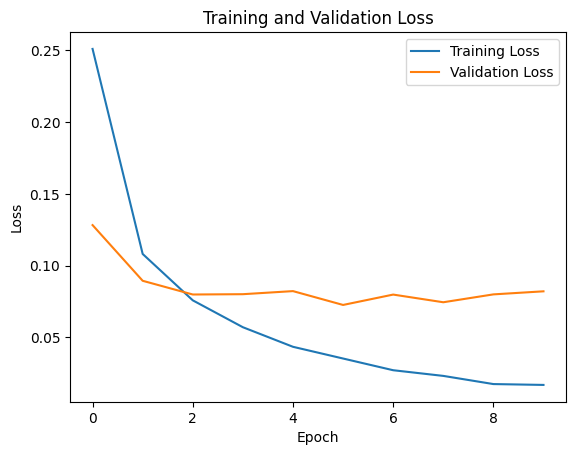

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 데이터 준비
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255

# 모델 정의
model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),
    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# 훈련 손실 출력
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
